Import Libraries

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as srs

Import Datasets

In [180]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

Understand the Datasests

In [181]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [182]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [183]:
matches.shape

(1095, 20)

In [184]:
deliveries.shape

(260920, 17)

In [185]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [186]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [187]:
matches['team1'].value_counts()

team1
Royal Challengers Bangalore    135
Chennai Super Kings            128
Mumbai Indians                 123
Kolkata Knight Riders          121
Rajasthan Royals               101
Kings XI Punjab                 92
Sunrisers Hyderabad             86
Delhi Daredevils                85
Delhi Capitals                  41
Deccan Chargers                 39
Punjab Kings                    31
Lucknow Super Giants            23
Pune Warriors                   23
Gujarat Titans                  21
Gujarat Lions                   16
Royal Challengers Bengaluru      9
Kochi Tuskers Kerala             7
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Name: count, dtype: int64

In [188]:
deliveries['batting_team'].value_counts()

batting_team
Mumbai Indians                 31437
Kolkata Knight Riders          29514
Chennai Super Kings            28651
Royal Challengers Bangalore    28205
Rajasthan Royals               26242
Kings XI Punjab                22646
Sunrisers Hyderabad            21843
Delhi Daredevils               18786
Delhi Capitals                 10946
Deccan Chargers                 9034
Punjab Kings                    6833
Gujarat Titans                  5494
Pune Warriors                   5443
Lucknow Super Giants            5400
Gujarat Lions                   3566
Rising Pune Supergiant          1900
Royal Challengers Bengaluru     1818
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: count, dtype: int64

Data Cleaning

In [189]:
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [190]:
matches['method'].value_counts()

method
D/L    21
Name: count, dtype: int64

In [191]:
matches['result_margin'] = matches['result_margin'].fillna(0)
matches['city'] = matches['city'].fillna('Unknown')
matches['method'] = matches['method'].fillna('Non D/L')

In [192]:
matches.dropna(subset=['winner', 'player_of_match'], inplace=True)

In [193]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [194]:
deliveries['extras_type'].value_counts()

extras_type
wides      8380
legbyes    4001
noballs    1069
byes        673
penalty       2
Name: count, dtype: int64

In [195]:
deliveries['extras_type'] = deliveries['extras_type'].fillna('Legal Ball')
deliveries['player_dismissed'] = deliveries['player_dismissed'].fillna('None')

In [196]:
deliveries.duplicated().sum()

np.int64(0)

In [197]:
matches.duplicated().sum()

np.int64(0)

In [198]:
matches['city'].value_counts()

city
Mumbai            173
Kolkata            93
Delhi              89
Chennai            85
Hyderabad          77
Bangalore          63
Chandigarh         61
Jaipur             57
Pune               51
Unknown            51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          28
Durban             15
Visakhapatnam      15
Dubai              13
Lucknow            13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Indore              9
Navi Mumbai         9
Johannesburg        8
Ranchi              7
Port Elizabeth      7
Cuttack             7
Cape Town           7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

In [199]:
matches['city'] = matches['city'].replace({'Bengaluru':'Bangalore'})

In [200]:
matches['team1'].value_counts()

team1
Royal Challengers Bangalore    132
Chennai Super Kings            128
Mumbai Indians                 123
Kolkata Knight Riders          121
Rajasthan Royals               101
Kings XI Punjab                 92
Sunrisers Hyderabad             86
Delhi Daredevils                84
Delhi Capitals                  41
Deccan Chargers                 39
Punjab Kings                    31
Pune Warriors                   23
Lucknow Super Giants            22
Gujarat Titans                  21
Gujarat Lions                   16
Royal Challengers Bengaluru      9
Kochi Tuskers Kerala             7
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Name: count, dtype: int64

In [201]:
team_corrections = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Punjab Kings': 'Kings XI Punjab'
}

matches['team1'] = matches['team1'].replace(team_corrections)
matches['team2'] = matches['team2'].replace(team_corrections)
matches['winner'] = matches['winner'].replace(team_corrections)
matches['toss_winner'] = matches['toss_winner'].replace(team_corrections)


In [202]:
matches['venue'].value_counts()

venue
Eden Gardens                                                             77
Wankhede Stadium                                                         73
M Chinnaswamy Stadium                                                    63
Feroz Shah Kotla                                                         59
Rajiv Gandhi International Stadium, Uppal                                49
MA Chidambaram Stadium, Chepauk                                          48
Sawai Mansingh Stadium                                                   47
Dubai International Cricket Stadium                                      46
Wankhede Stadium, Mumbai                                                 45
Punjab Cricket Association Stadium, Mohali                               35
Sheikh Zayed Stadium                                                     29
Sharjah Cricket Stadium                                                  28
MA Chidambaram Stadium, Chepauk, Chennai                                 28
Narend

In [203]:
venue_corrections = {
    'Dr DY Patil Sports Academy': 'Dr DY Patil Sports Academy, Mumbai',
    'Wankhede Stadium': 'Wankhede Stadium, Mumbai',
    'Punjab Cricket Association IS Bindra Stadium': 'Punjab Cricket Association IS Bindra Stadium, Mohali',
    'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh': 'Punjab Cricket Association IS Bindra Stadium, Mohali',
    'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association IS Bindra Stadium, Mohali',
    'Rajiv Gandhi International Stadium': 'Rajiv Gandhi International Stadium, Uppal',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad':'Rajiv Gandhi International Stadium, Uppal',
    'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium, Bengaluru',
    'M Chinnaswamy Stadium': 'M Chinnaswamy Stadium, Bengaluru',
    'Arun Jaitley Stadium': 'Arun Jaitley Stadium, Delhi',
    'Brabourne Stadium': 'Brabourne Stadium, Mumbai',
    'Maharashtra Cricket Association Stadium': 'Maharashtra Cricket Association Stadium, Pune',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'MA Chidambaram Stadium, Chepauk',
    'MA Chidambaram Stadium': 'MA Chidambaram Stadium, Chepauk',
    'Eden Gardens': 'Eden Gardens, Kolkata'
}
matches['venue'] = matches['venue'].replace(venue_corrections)

In [204]:
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,None,NaN,NaN


In [205]:
team_corrections = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Punjab Kings': 'Kings XI Punjab'
}

deliveries['batting_team'] = deliveries['batting_team'].replace(team_corrections)
deliveries['bowling_team'] = deliveries['bowling_team'].replace(team_corrections)

In [206]:
deliveries['bowling_team'].value_counts()

bowling_team
Mumbai Indians                 31505
Royal Challengers Bangalore    30159
Delhi Capitals                 29941
Kolkata Knight Riders          29663
Kings XI Punjab                29202
Chennai Super Kings            28576
Rajasthan Royals               26432
Sunrisers Hyderabad            21717
Deccan Chargers                 9039
Pune Warriors                   5457
Gujarat Titans                  5301
Lucknow Super Giants            5226
Gujarat Lions                   3545
Rising Pune Supergiants         3543
Kochi Tuskers Kerala            1614
Name: count, dtype: int64

Exploratory Data Analysis

Most successful teams

In [207]:
wins = matches['winner'].value_counts()
played_matches = matches['team1'].value_counts() + matches['team2'].value_counts()
win_percentage = ((wins/played_matches)*100).sort_values(ascending = False)
win_percentage

Gujarat Titans                 62.222222
Chennai Super Kings            58.227848
Lucknow Super Giants           55.813953
Mumbai Indians                 55.172414
Kolkata Knight Riders          52.191235
Rajasthan Royals               51.141553
Rising Pune Supergiants        50.000000
Royal Challengers Bangalore    48.809524
Sunrisers Hyderabad            48.351648
Delhi Capitals                 46.000000
Kings XI Punjab                45.528455
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Deccan Chargers                38.666667
Pune Warriors                  26.666667
Name: count, dtype: float64

In [208]:
import random
def random_colors(n):
    return ['#%06X' % random.randint(0, 0xFFFFFF) for _ in range(n)]

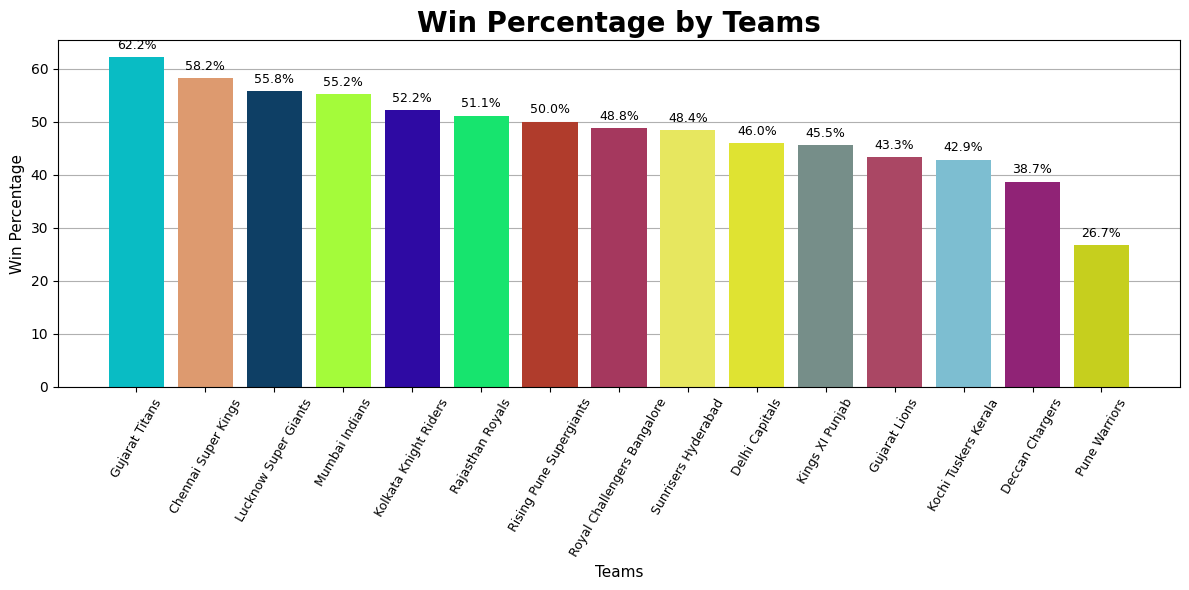

In [209]:
plt.figure(figsize=(12, 6))
bars = plt.bar(win_percentage.index, win_percentage.values, color=random_colors(len(win_percentage)), zorder=2)

# Grid under bars
plt.grid(axis='y', zorder=1)

# Titles and labels
plt.title('Win Percentage by Teams', fontsize=20, fontweight='bold')
plt.xlabel('Teams',fontsize = 11)
plt.ylabel('Win Percentage',fontsize = 11)
plt.xticks(rotation=60, fontsize=9)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [210]:
# conclusion Gujarat Titans, Chennai Super Kings, Lucknow super Giants are the most successful teams according to win percentage

Most Titles Wins

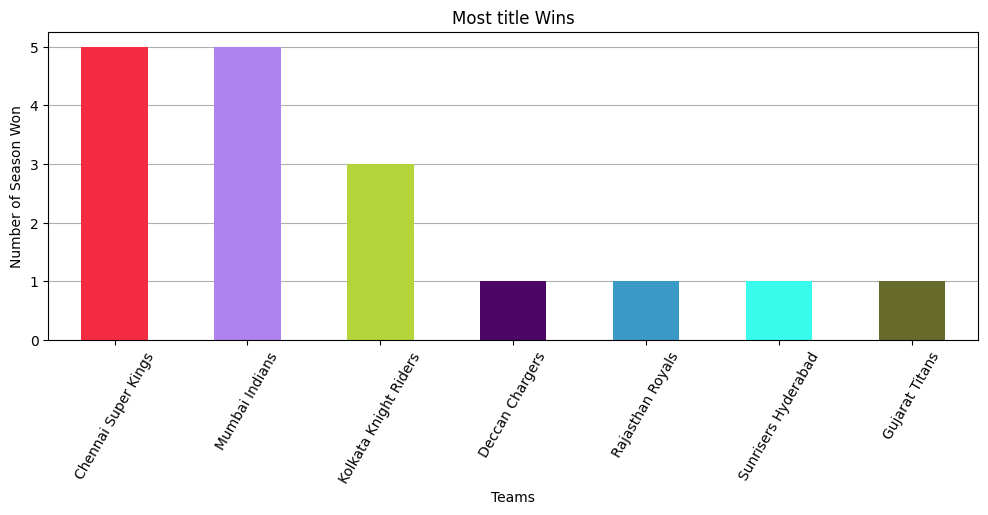

In [211]:
winner_counts = matches.groupby('season')[['season','winner']].tail(1)['winner'].value_counts()

plt.figure(figsize=(12,4))
winner_counts.plot(kind='bar', color=random_colors(len(winner_counts)),zorder=2)
plt.title('Most title Wins')
plt.xlabel('Teams')
plt.ylabel('Number of Season Won')
plt.grid(axis='y',zorder=1)
plt.xticks(rotation=60)
plt.show()

In [212]:
# Chennai Super Kings and mumbai Indians Won the most titels in IPL. 

Top 10 Players with Most Runs

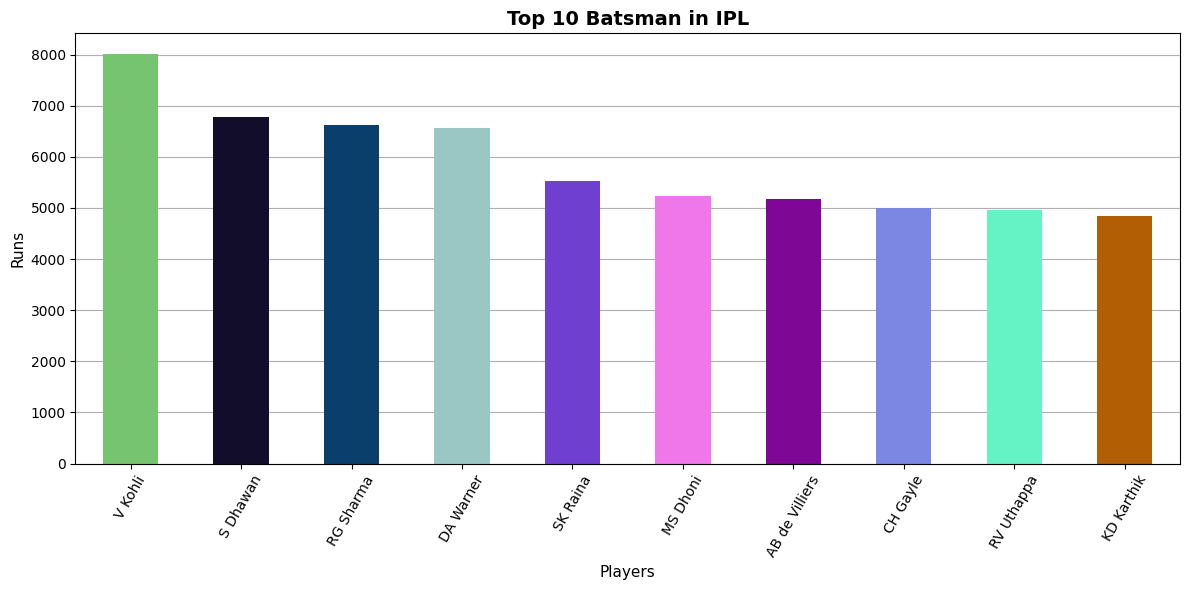

In [213]:
run_by_batter = deliveries.groupby('batter')['batsman_runs'].sum()
top_10 = run_by_batter.sort_values(ascending=False).head(10)


plt.figure(figsize=(12,6))
top_10.plot(kind='bar', color= random_colors(10), zorder=2)
plt.title('Top 10 Batsman in IPL', fontsize = 14 , fontweight='bold')
plt.xlabel('Players', fontsize=11)
plt.ylabel('Runs', fontsize=11)
plt.grid(axis='y',zorder=1)
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [214]:
## Virat Kohli Scored most runs by a batsman in IPL till 2024

Highest Strike Rate of a Player

In [215]:
balls_faced = deliveries[deliveries['extras_type'] != 'wides'].groupby('batter').size()
balls_faced.sort_values(ascending=False)

batter
V Kohli         6069
S Dhawan        5326
RG Sharma       5057
DA Warner       4702
SK Raina        4046
                ... 
S Lamichhane       1
Mayank Dagar       1
Sunny Gupta        1
SZ Mulani          1
U Kaul             1
Length: 673, dtype: int64

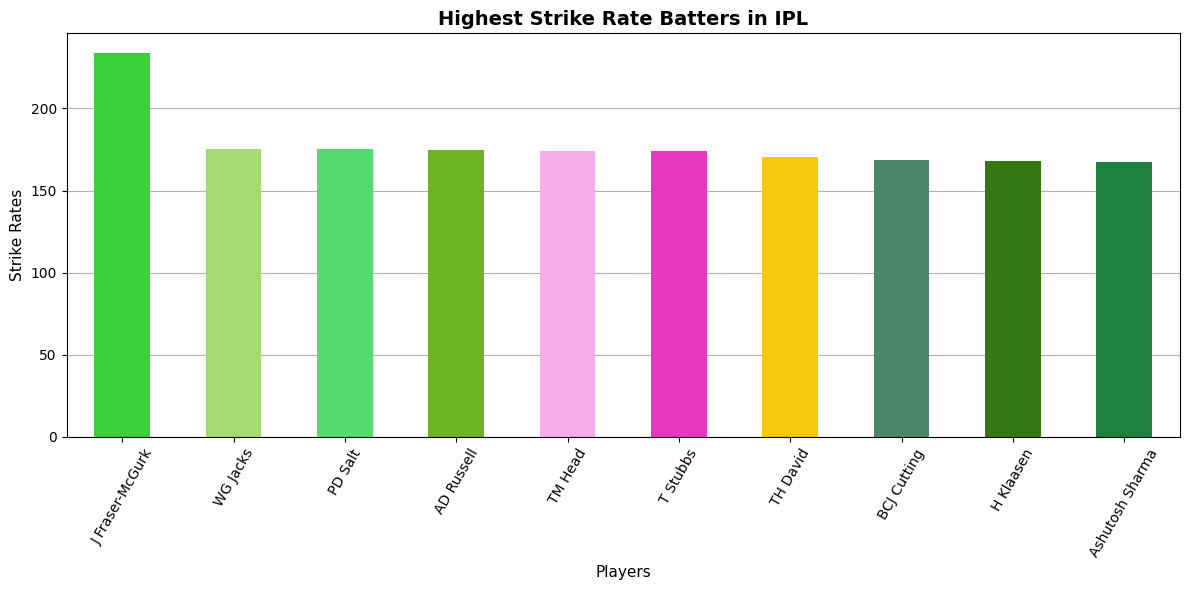

In [216]:
strike_rate = (run_by_batter/balls_faced)*100
strikerate = strike_rate[balls_faced>=100]
top_strike_rate = strikerate.sort_values(ascending= False).head(10)

plt.figure(figsize=(12,6))
top_strike_rate.plot(kind='bar', color= random_colors(10), zorder=2)
plt.title('Highest Strike Rate Batters in IPL', fontsize = 14 , fontweight='bold')
plt.xlabel('Players', fontsize=11)
plt.ylabel('Strike Rates', fontsize=11)
plt.grid(axis='y',zorder=1)
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [217]:
## Frase-McGurk and Will Jacks have the highest Strike rate after playing 100+ balls in whole ipl season

Top 10 Best Performance in a Match

In [218]:
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,None,NaN,NaN


In [219]:
batting_ings = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index(name='Innings Runs')
top_performers = batting_ings.sort_values(by = 'Innings Runs', ascending=False)[:10]

In [220]:
batsman_balls_faced = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].count().reset_index(name='Balls Faced')

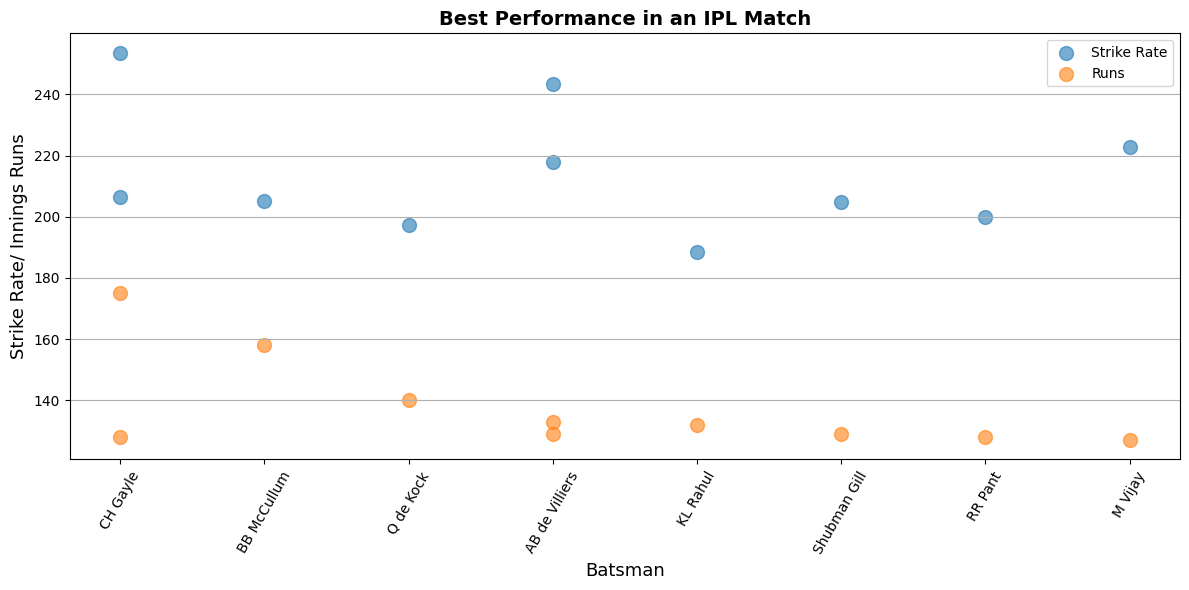

In [221]:
batsmen_performance = pd.merge(top_performers,batsman_balls_faced, how= 'inner',on=['match_id','batter'])
batsmen_performance['Strike Rate'] = np.round(batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced'],2)

plt.figure(figsize=(12,6))
plt.scatter(batsmen_performance['batter'],batsmen_performance['Strike Rate'], label='Strike Rate',s=100, alpha=0.6)
plt.scatter(batsmen_performance['batter'],batsmen_performance['Innings Runs'], label='Runs',s=100, alpha=0.6)
plt.title('Best Performance in an IPL Match', fontsize = 14 , fontweight='bold')
plt.xlabel('Batsman', fontsize=13)
plt.ylabel('Strike Rate/ Innings Runs', fontsize=13)
plt.grid(axis='y',zorder=1)
plt.legend()
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

Top 10 Bowlers till 2024

In [222]:
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,None,NaN,NaN


In [223]:
deliveries['dismissal_kind'].value_counts()

dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64

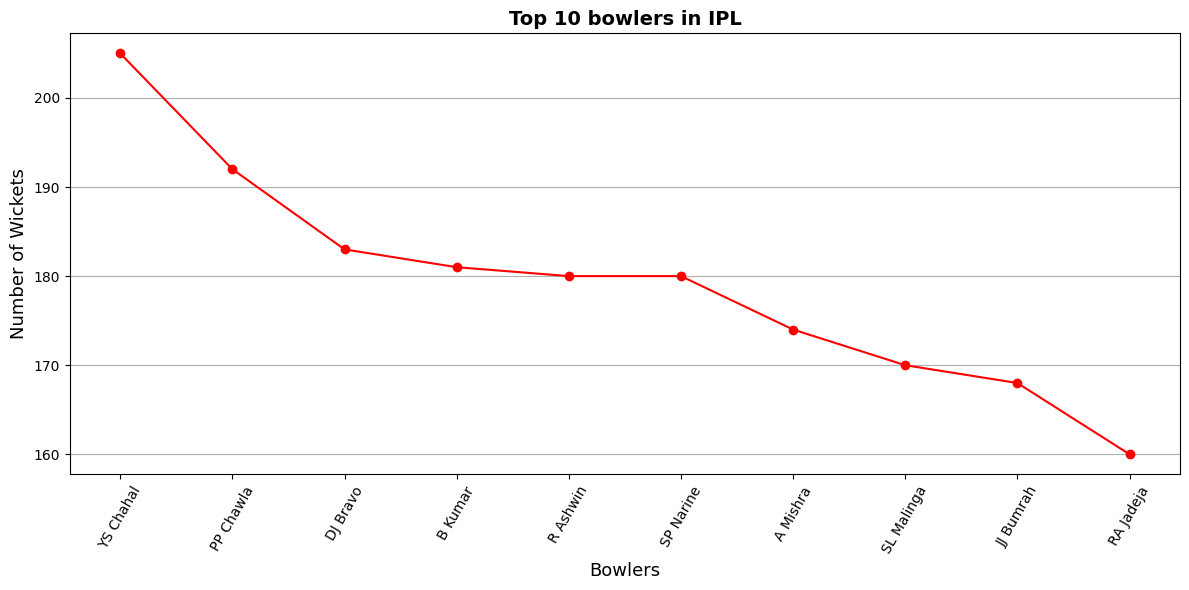

In [224]:

bowler_wickets = deliveries[deliveries['dismissal_kind'].isin(['bowled', 'caught', 'lbw', 'stumped','caught and bowled', 'hit wicket'])]
top_bowlers = bowler_wickets.groupby('bowler')['dismissal_kind'].count().reset_index(name='Wickets').sort_values(by='Wickets',ascending = False)[:10]

plt.figure(figsize=(12,6))
plt.plot(top_bowlers['bowler'],top_bowlers['Wickets'], marker='o',color = 'red')
plt.title('Top 10 bowlers in IPL', fontsize = 14 , fontweight='bold')
plt.xlabel('Bowlers', fontsize=13)
plt.ylabel('Number of Wickets', fontsize=13)
plt.grid(axis='y',zorder=1)
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

Top 10 bowling performance till 20224

In [225]:
match_bowler_wickets = bowler_wickets.groupby(['match_id','bowler'])['dismissal_kind'].count().reset_index(name='wicket'
                                    ).sort_values(by='wicket',ascending=False)[:10]

In [226]:
match_bowler_runs = deliveries.groupby(['match_id','bowler'])['total_runs'].sum().reset_index(name= 'runs conceded')


In [227]:
match_bowler_performance = pd.merge(match_bowler_runs,match_bowler_wickets, how = 'inner', on=['match_id','bowler'])

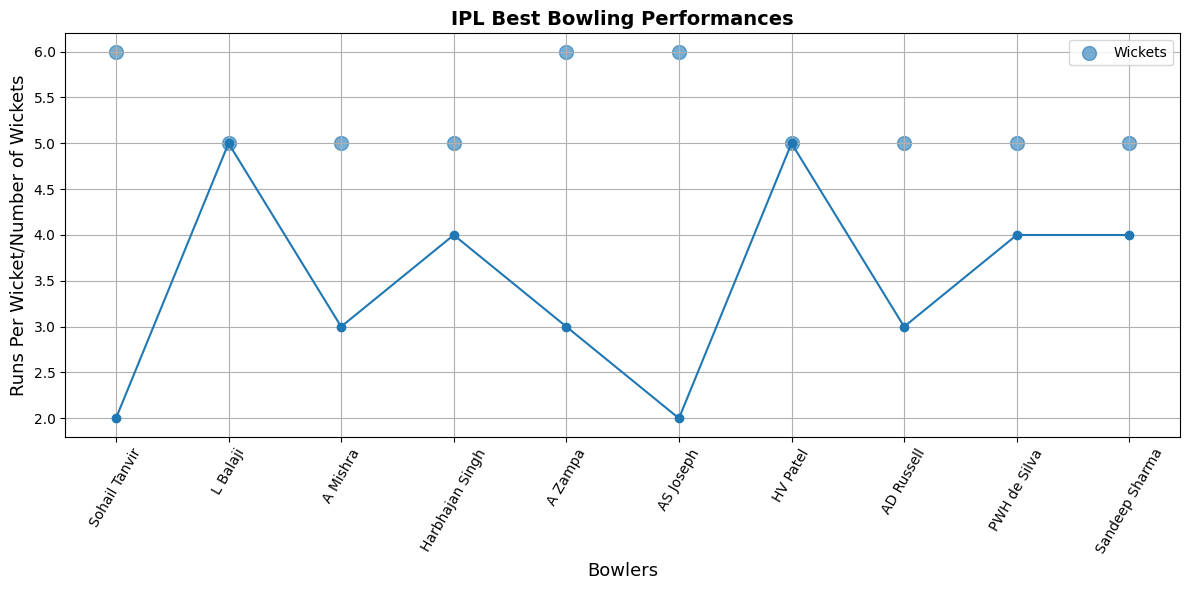

In [228]:
match_bowler_performance['Runs per Wicket'] = np.round(match_bowler_performance['runs conceded']/match_bowler_performance['wicket'],0)

plt.figure(figsize=(12,6))
plt.scatter(match_bowler_performance['bowler'],match_bowler_performance['wicket'], label='Wickets',s= 100,alpha=0.6)
plt.plot(match_bowler_performance['bowler'],match_bowler_performance['Runs per Wicket'],marker = 'o')
plt.title('IPL Best Bowling Performances', fontsize = 14 , fontweight='bold')
plt.xlabel('Bowlers', fontsize=13)
plt.ylabel('Runs Per Wicket/Number of Wickets', fontsize=13)
plt.xticks(rotation=60)
plt.legend()
plt.grid(zorder=1)
plt.tight_layout()
plt.show()

Top 10 cities by number of matches

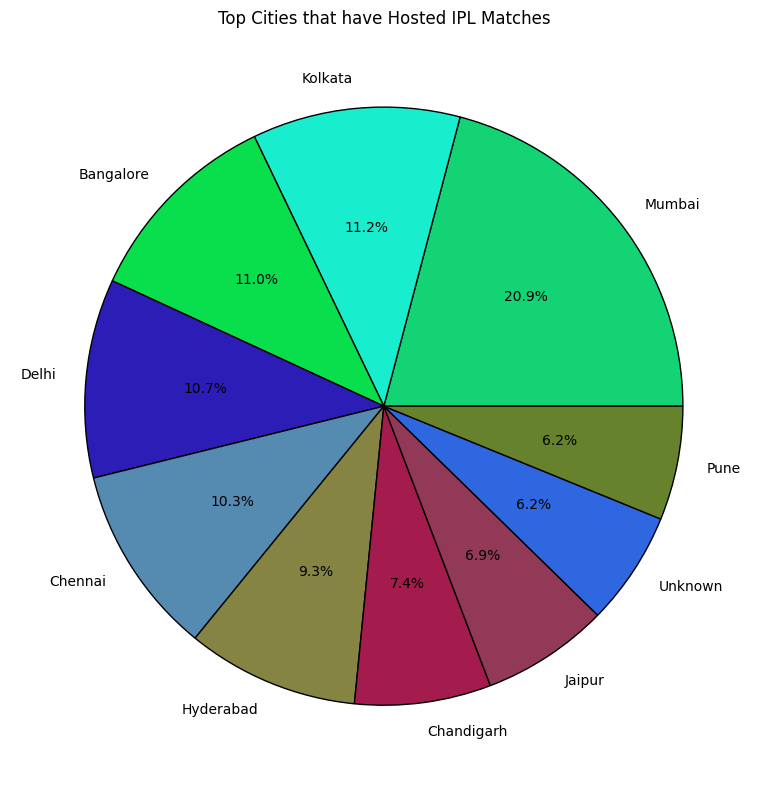

In [229]:
top_cities = matches['city'].value_counts().reset_index(name='match count')[:10]

plt.figure(figsize=(8,8))
plt.pie(top_cities['match count'], labels= top_cities['city'],colors= random_colors(10),
        autopct= '%1.1f%%',wedgeprops=dict(edgecolor='black'))
plt.title('Top Cities that have Hosted IPL Matches')
plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_6132\1939498078.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  srs.countplot(x='dismissal_kind',data = deliveries,palette = random_colors(len(deliveries['dismissal_kind'].value_counts())))


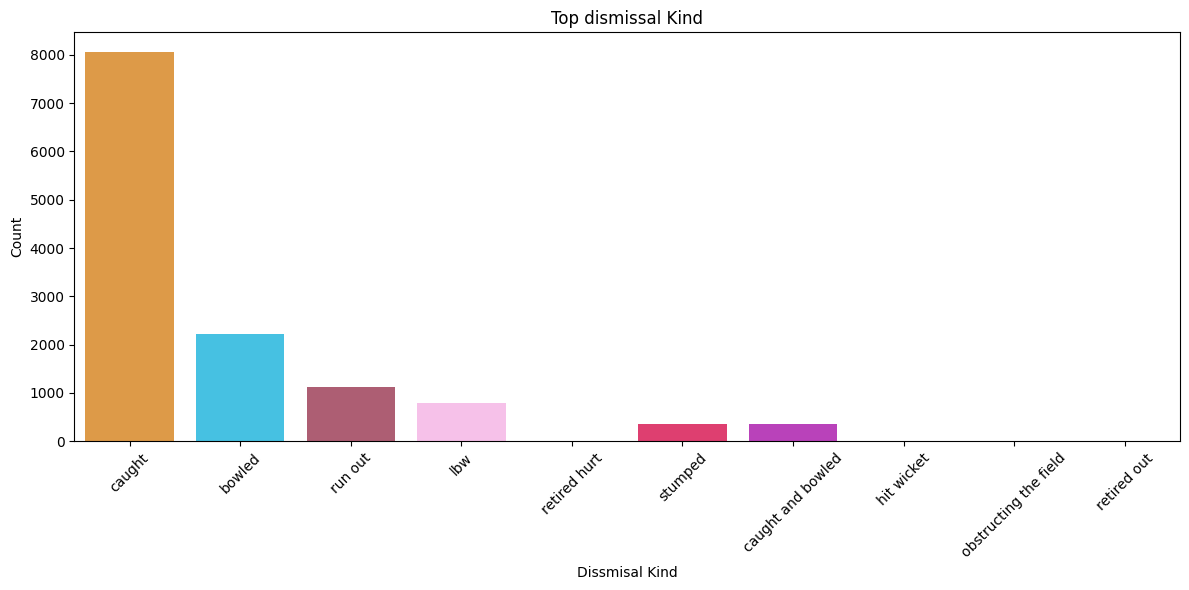

In [230]:
plt.figure(figsize=(12,6))
srs.countplot(x='dismissal_kind',data = deliveries,palette = random_colors(len(deliveries['dismissal_kind'].value_counts())))
plt.title('Top dismissal Kind')
plt.xlabel('Dissmisal Kind')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Top 10 Best Fielders

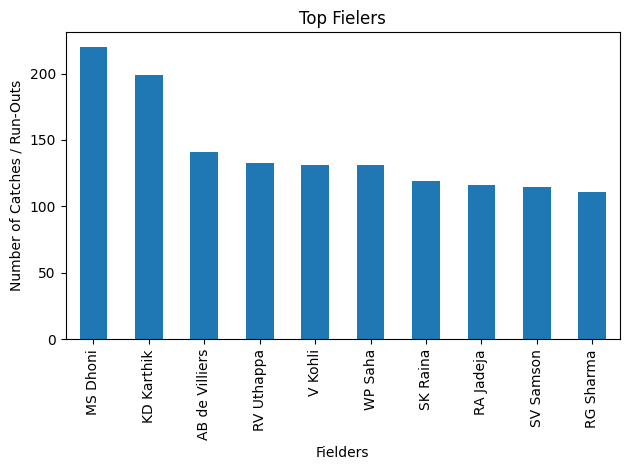

In [235]:
deliveries['fielder'].value_counts()[:10].plot(kind='bar')
plt.title('Top Fielers')
plt.xlabel('Fielders')
plt.ylabel('Number of Catches / Run-Outs')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Analysis Over By Over

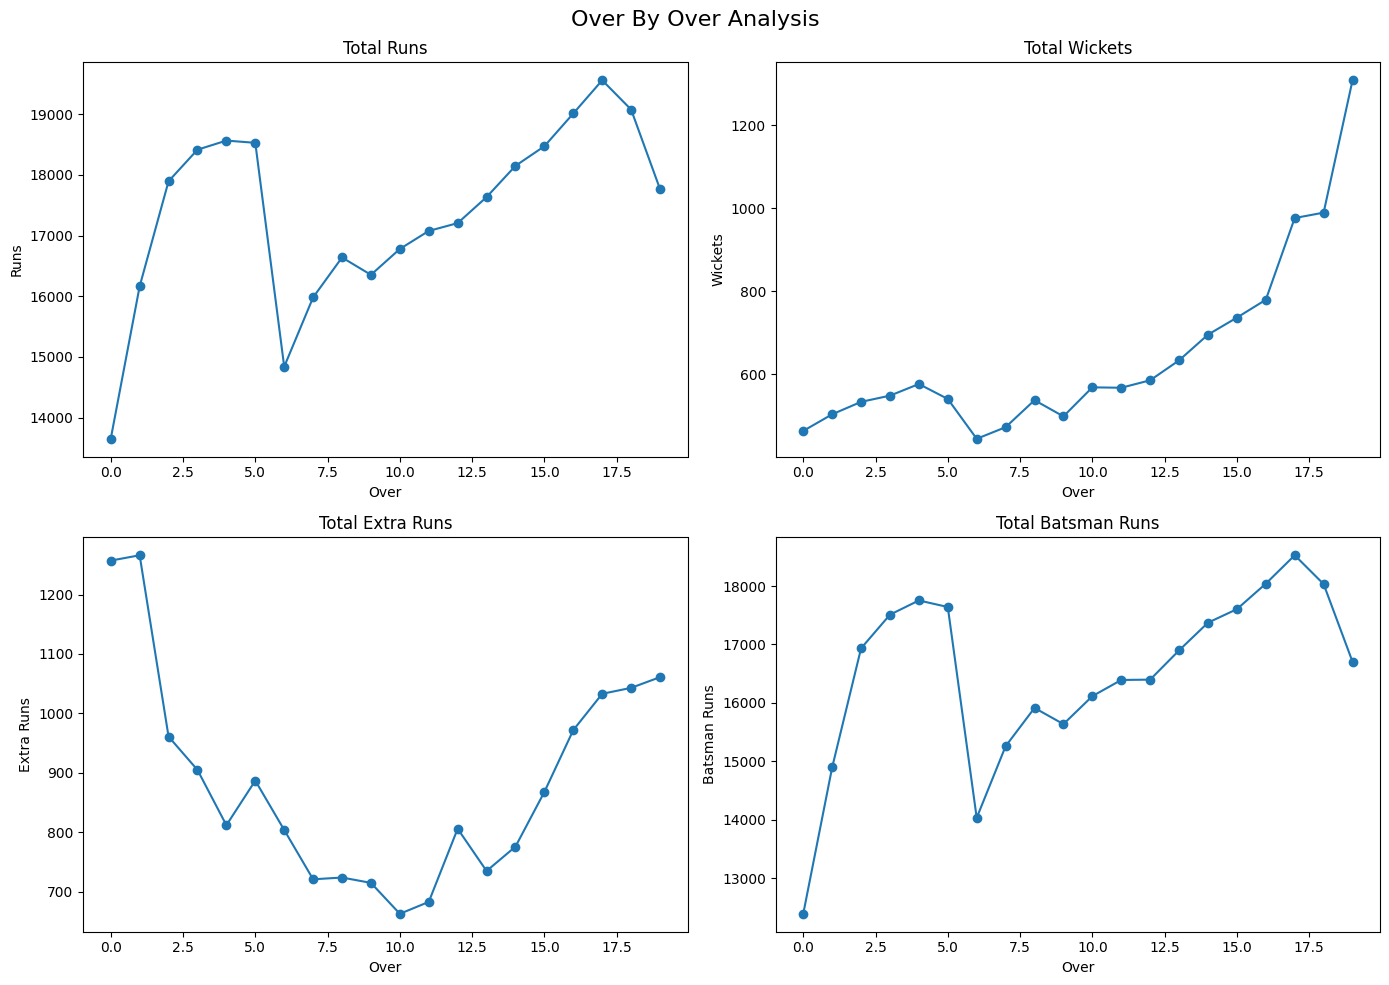

In [248]:
over_summary = deliveries.groupby('over')[['total_runs','is_wicket', 'extra_runs', 'batsman_runs']].sum()

fig, axes = plt.subplots(2,2,figsize=(14,10))
fig.suptitle('Over By Over Analysis', fontsize = 16)

axes[0,0].plot(over_summary.index, over_summary['total_runs'],marker = 'o')
axes[0,0].set_title('Total Runs')
axes[0,0].set_xlabel('Over')
axes[0,0].set_ylabel('Runs')

axes[0,1].plot(over_summary.index, over_summary['is_wicket'],marker = 'o')
axes[0,1].set_title('Total Wickets')
axes[0,1].set_xlabel('Over')
axes[0,1].set_ylabel('Wickets')

axes[1,0].plot(over_summary.index, over_summary['extra_runs'],marker = 'o')
axes[1,0].set_title('Total Extra Runs')
axes[1,0].set_xlabel('Over')
axes[1,0].set_ylabel('Extra Runs')

axes[1,1].plot(over_summary.index, over_summary['batsman_runs'],marker = 'o')
axes[1,1].set_title('Total Batsman Runs')
axes[1,1].set_xlabel('Over')
axes[1,1].set_ylabel('Batsman Runs')

plt.tight_layout()
plt.show()

Toss Decisions

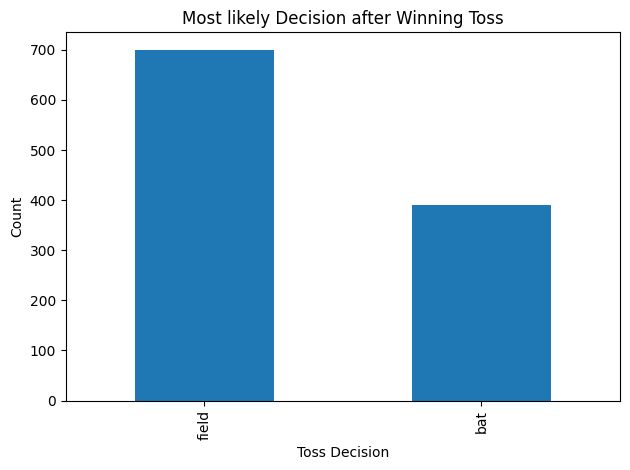

In [250]:
matches['toss_decision'].value_counts()[:10].plot(kind='bar')
plt.title('Most likely Decision after Winning Toss')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()